In [ ]:
from sklearn.datasets import fetch_openml
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
mnist_X

In [7]:
mnist = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=False)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [8]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


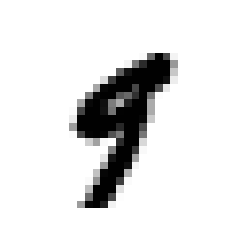

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [41]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [47]:
y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [49]:
print(sgd_clf.score(X_train, y_train_5))
print(sgd_clf.score(X_test, y_test_5))

0.9522666666666667
0.9492


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
fro train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    x_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_folds = x_test[test_index]
    y_test_folds = y_test[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5613,    0,   58,   32,   13,   69,   54,   13,   53,   18],
       [   2, 6483,   52,   21,    8,   24,    9,   11,  115,   17],
       [  67,   89, 5124,  108,   78,   37,  119,   91,  217,   28],
       [  37,   42,  194, 5149,   29,  253,   43,   82,  197,  105],
       [  29,   30,   44,   11, 5167,   19,   61,   50,   69,  362],
       [  76,   32,   49,  252,   92, 4418,  129,   20,  263,   90],
       [  45,   20,   75,    8,   47,   98, 5580,    2,   38,    5],
       [  30,   25,   54,   40,   80,   26,    8, 5599,   47,  356],
       [  46,  200,  161,  180,   69,  277,   64,   33, 4672,  149],
       [  32,   40,   34,   97,  302,   71,    6,  284,  100, 4983]],
      dtype=int64)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train, y_train_pred, average="macro"))
print(recall_score(y_train, y_train_pred, average="macro"))
print(f1_score(y_train, y_train_pred, average="macro"))

0.8781714816602457
0.8781229426143075
0.8780295041097735


In [50]:
import numpy as np
y_scores = sgd_clf.decision_function(X_train)

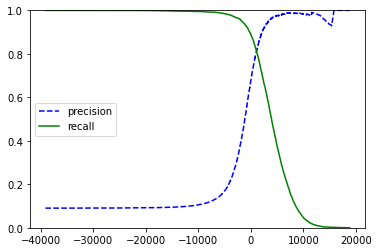

In [53]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

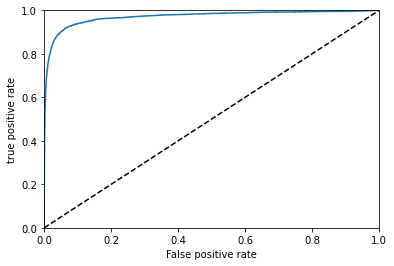

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=None)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("true positive rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9709618248430906

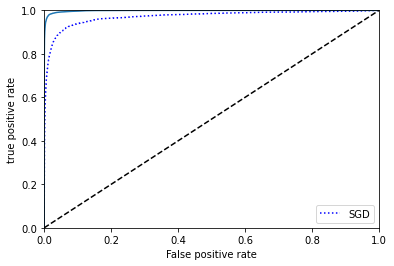

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right")
plt.show()

In [77]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [79]:
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

In [80]:
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))

0.8866401587452636
0.8722016551120783
0.8749260091812581


In [81]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X_test[0]])
len(ovo_clf.estimators_)

45

In [82]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([X_test[0]])
forest_clf.predict_proba([X_test[0]])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [88]:
y_train_pred

array([0.8983, 0.891 , 0.9018])

In [87]:
y_train_pred = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

ValueError: Found input variables with inconsistent numbers of samples: [60000, 3]

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()